In [45]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

In [48]:
train_data, test_data = tfds.load(name="imdb_reviews", split=["train", "test"], 
                                  batch_size=-1, as_supervised=True)

In [49]:
train_examples, train_labels = tfds.as_numpy(train_data)
test_examples, test_labels = tfds.as_numpy(test_data)

In [51]:
partial_train_examples = train_examples[10000:]
partial_train_labels = train_labels[10000:]

val_examples = train_examples[:10000]
val_labels = train_labels[:10000]

In [52]:
embedding = "https://tfhub.dev/google/nnlm-en-dim50/2"
hub_layer = hub.KerasLayer(embedding, dtype = tf.string, trainable = True)

In [53]:
model = tf.keras.models.Sequential()
model.add(hub_layer)
model.add(tf.keras.layers.Dense(10, activation = 'relu'))
model.add(tf.keras.layers.Dense(1, activation = 'sigmoid'))

In [54]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss = tf.keras.losses.BinaryCrossentropy(from_logits = True),
              metrics = ['accuracy'])

In [56]:
history = model.fit(partial_train_examples,
                    partial_train_labels,
                    validation_data = (val_examples, val_labels),
                    epochs = 5, 
                    batch_size = 512)

Epoch 1/5
30/30 [==============================] - 38s 1s/step - loss: 0.6619 - accuracy: 0.6198 - val_loss: 0.6432 - val_accuracy: 0.6579
Epoch 2/5
30/30 [==============================] - 37s 1s/step - loss: 0.6032 - accuracy: 0.7198 - val_loss: 0.5850 - val_accuracy: 0.7244
Epoch 3/5
30/30 [==============================] - 37s 1s/step - loss: 0.5250 - accuracy: 0.7864 - val_loss: 0.5129 - val_accuracy: 0.7810
Epoch 4/5
30/30 [==============================] - 37s 1s/step - loss: 0.4250 - accuracy: 0.8457 - val_loss: 0.4258 - val_accuracy: 0.8301
Epoch 5/5
30/30 [==============================] - 45s 2s/step - loss: 0.3205 - accuracy: 0.8918 - val_loss: 0.3649 - val_accuracy: 0.8513


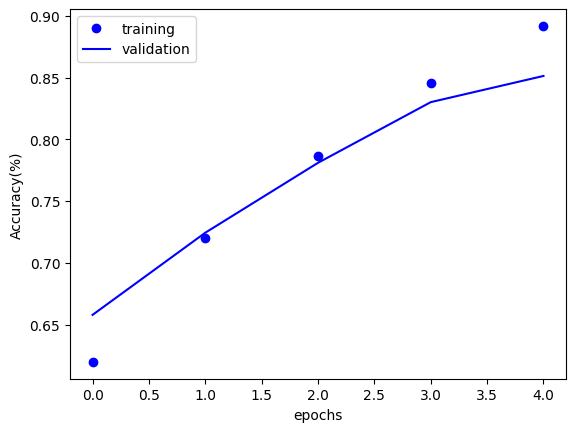

In [57]:
plt.plot(history.history['accuracy'], 'bo')
plt.plot(history.history['val_accuracy'], 'b')
plt.xlabel('epochs')
plt.ylabel('Accuracy(%)')
plt.legend(['training', 'validation'])
plt.show()